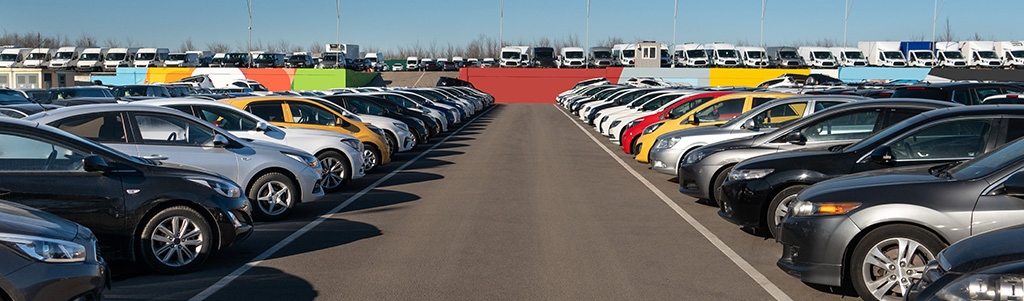

In [3]:
from IPython.display import Image
Image(filename='Used-Cars.jpg')

# 🏁 Project Overview #
With the rise of varied car options in the market, from sedans and hatchbacks to SUVs, customers are looking for ways to estimate a car's price based on its specifications. Factors like brand, production year, category, fuel type, engine volume, mileage, cylinders, color, and airbags can have a significant impact on the final price. In this project, we'll build a regression model using machine learning to predict car prices based on available features.

# ✅ Goal
- Build a robust, interpretable regression model that can:

- Ingest car feature data,

- Preprocess and encode necessary columns,

- Train a prediction model,

- Evaluate its performance,

- Visualize results and errors.

**Import Libraries**


In [144]:
from pandas import read_csv, to_numeric, DataFrame, concat
from matplotlib.pyplot import show, suptitle, subplots_adjust, tight_layout, plot, legend, subplots
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, text, grid, xticks, tight_layout, style 
from numpy import nan, log, inf
from seaborn import kdeplot, heatmap, pairplot, boxplot
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
from pickle import dump


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 📥 2️⃣ Load the Dataset #


Exploratory Data Analysis (EDA)
1. Initial Data Understanding
Data loading and Inspection
Data Types
Missing Values
Duplicates

In [15]:
df = read_csv('car_price.csv')


In [19]:
df.head()


,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,4-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-May,Left wheel,Silver,4


# 👁️ 3️⃣ Explore the Data

In [23]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod_year         19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

,ID,Price,Prod_year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [25]:
df.tail()


,ID,Price,Levy,Manufacturer,Model,Prod_year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,2-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,4-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,4-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,4-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4,Automatic,Front,4-May,Left wheel,White,12


In [27]:
df.shape


(19237, 18)

In [29]:
df.columns


Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod_year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [32]:
df.isnull().sum()


ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [34]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod_year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [36]:
df.select_dtypes(include='object').describe()


,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,4-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


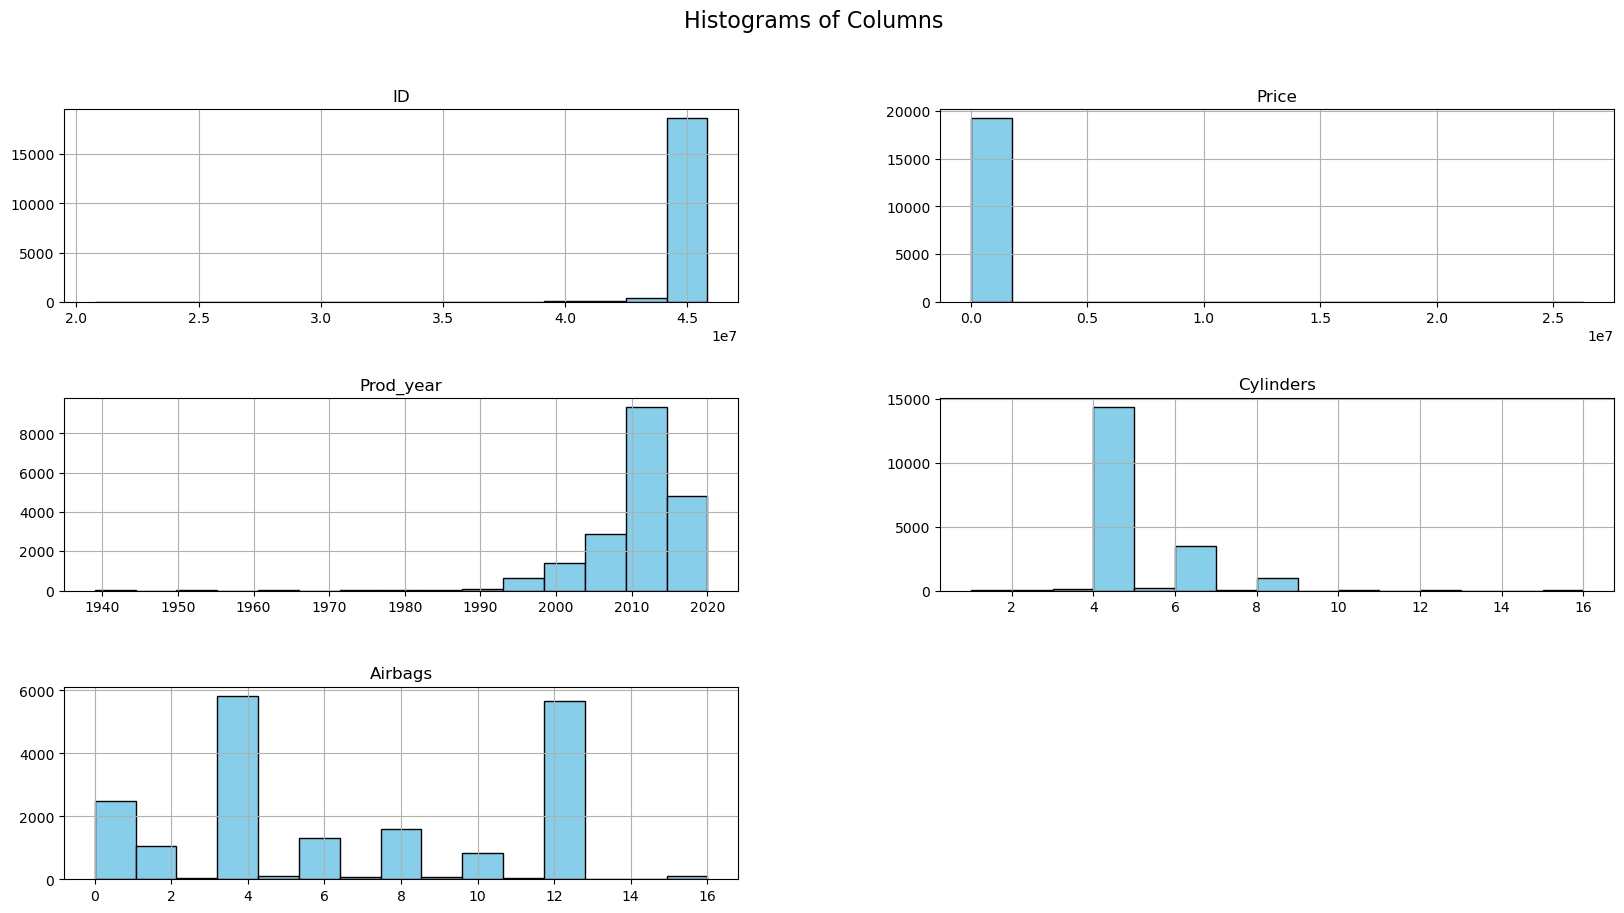

In [38]:

df.hist(bins=15, figsize=(20, 10), color='skyblue', edgecolor='black')
suptitle('Histograms of Columns', fontsize=16)
subplots_adjust(hspace=0.5)  
show()


In [40]:
df['Manufacturer'].value_counts()


Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: count, Length: 65, dtype: int64

In [48]:
# Extract top 5
top5=df['Manufacturer'].value_counts().sort_values(ascending=False)[:5]
top5

Manufacturer
HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
Name: count, dtype: int64

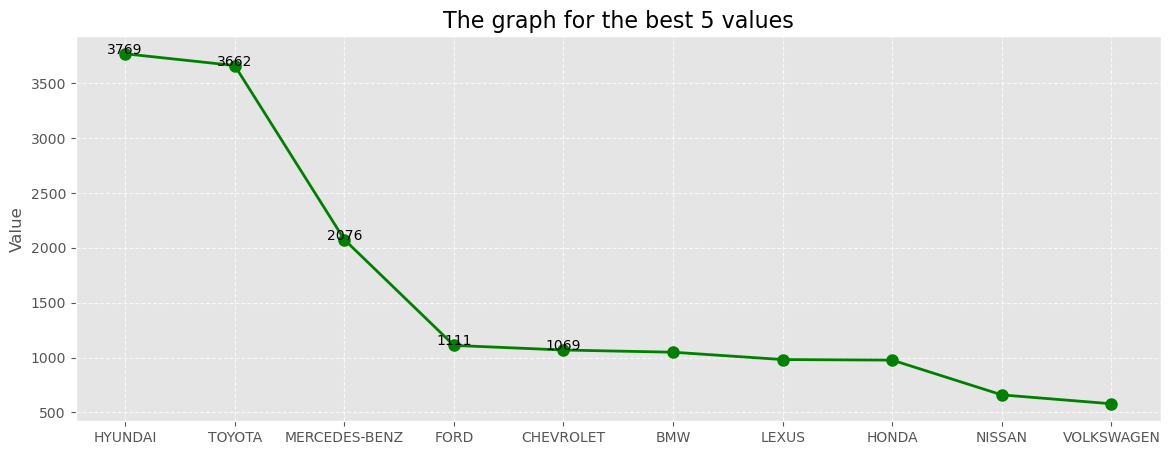

In [53]:

style.use('ggplot')
figure(figsize=(14, 5))

plot(top10, marker='o', color='green', linestyle='-', linewidth=2, markersize=8)
title('The graph for the best 5 values', fontsize=16)
ylabel('Value', fontsize=12)

for i, value in enumerate(top5):
    text(i, value + 0.5, str(value), ha='center', fontsize=10, color='black')

grid(True, linestyle='--', alpha=0.7)

show()


his is a line plot displaying the "Value" of the top 5 items, with the specific items labeled on the x-axis. The title "The graph for the best 5 values" suggests these are the 5 items with the highest values according to some metric.
The two top brands (Hyundai and Toyota) dominate with very high values (~3700), indicating strong performance or higher average pricing.

There is a sharp drop from the top two to the rest of the brands:

- The 3rd place (Mercedes‑Benz) has roughly 56% of the value of the top brand.

- The rest of the brands (Ford, Chevrolet, BMW, Lexus, Honda) range roughly from 1000–1100, suggesting comparable performance.
The lowest-performing brands (Nissan and Volkswagen) have roughly 15–18% of the top brand’s value.




In [56]:

top5MeanPrices=[df[df['Manufacturer']==i]['Price'].mean() for i in list(top5.index)]
top5MeanPrices

[22338.447864154947,
 14248.982250136538,
 18609.38294797688,
 15573.98199819982,
 14926.368568755846]

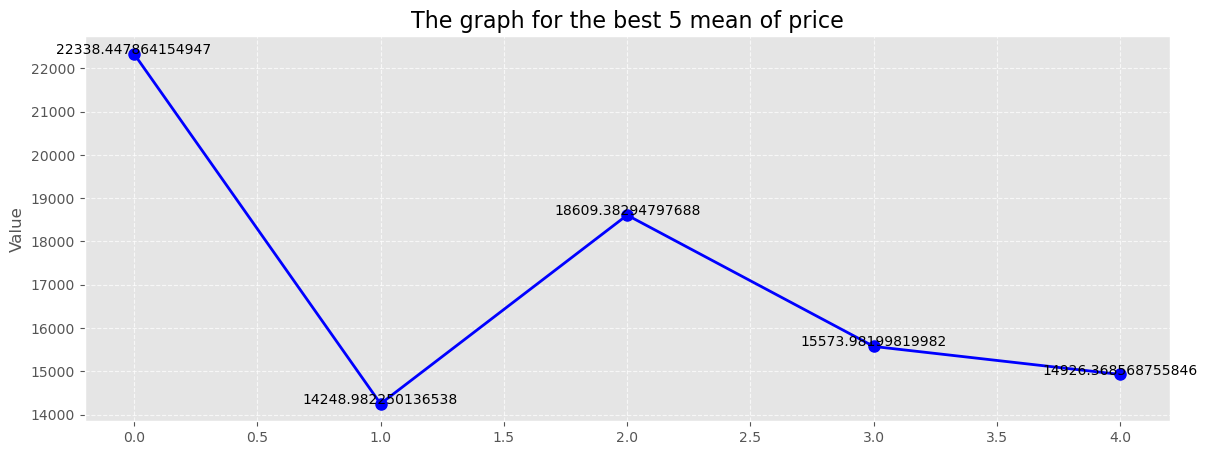

In [62]:
style.use('ggplot')
figure(figsize=(14, 5))

plot(top5MeanPrices, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
title('The graph for the best 5 mean of price', fontsize=16)
ylabel('Value', fontsize=12)

for i, value in enumerate(top5MeanPrices):
    text(i, value + 0.5, str(value), ha='center', fontsize=10, color='black')

grid(True, linestyle='--', alpha=0.7)

show()

- The item at index 0 has the highest mean of price (approximately 22338).
- The mean of price drops sharply from index 0 to index 1 (approximately 14248).
- The mean of price fluctuate somewhat between indices 1 and 4.
- The item at index 4 has the lowest mean of price among the top 5 (approximately 14926)

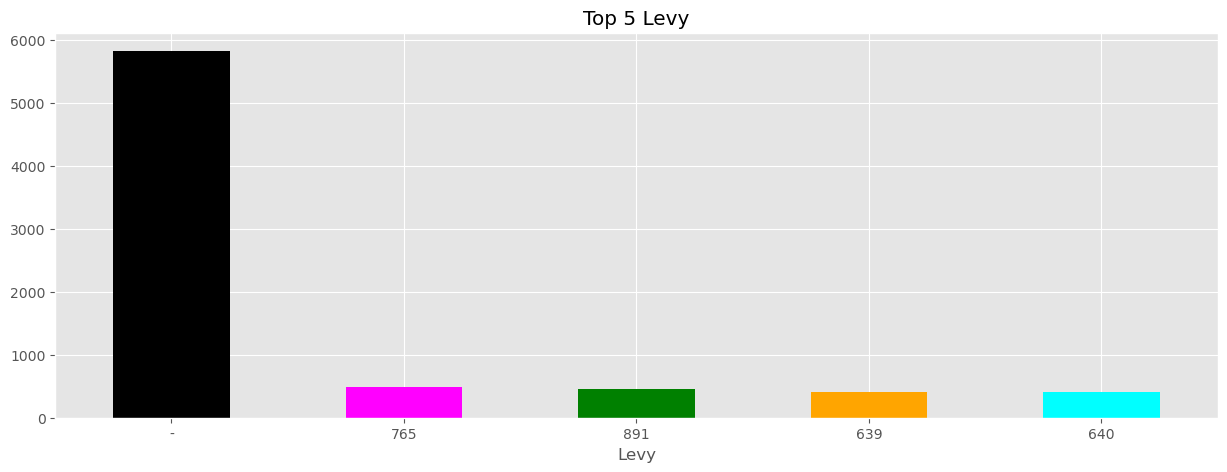

In [75]:

style.use('ggplot')
figure(figsize=(15,5))
Top5=df['Levy'].value_counts()[:5]
colors=['black','magenta','green','orange','cyan']
Top5.plot(kind='bar', color=colors)
xticks(rotation='horizontal' )
title('Top 5 Levy')
show()

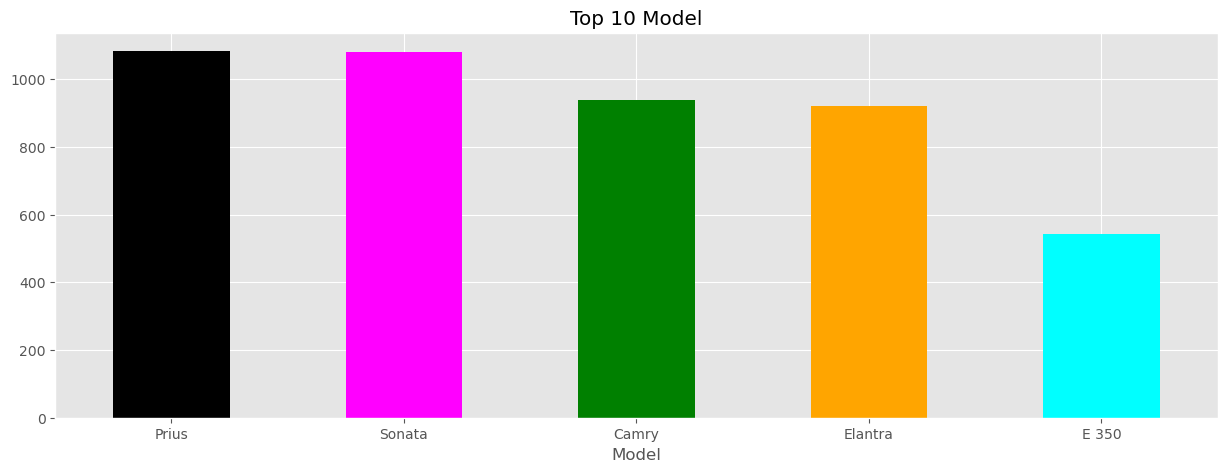

In [79]:
style.use('ggplot')
figure(figsize=(15,5))
Top5=df['Model'].value_counts()[:5]
colors=['black','magenta','green','orange','cyan']
Top5.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 10 Model')
show()

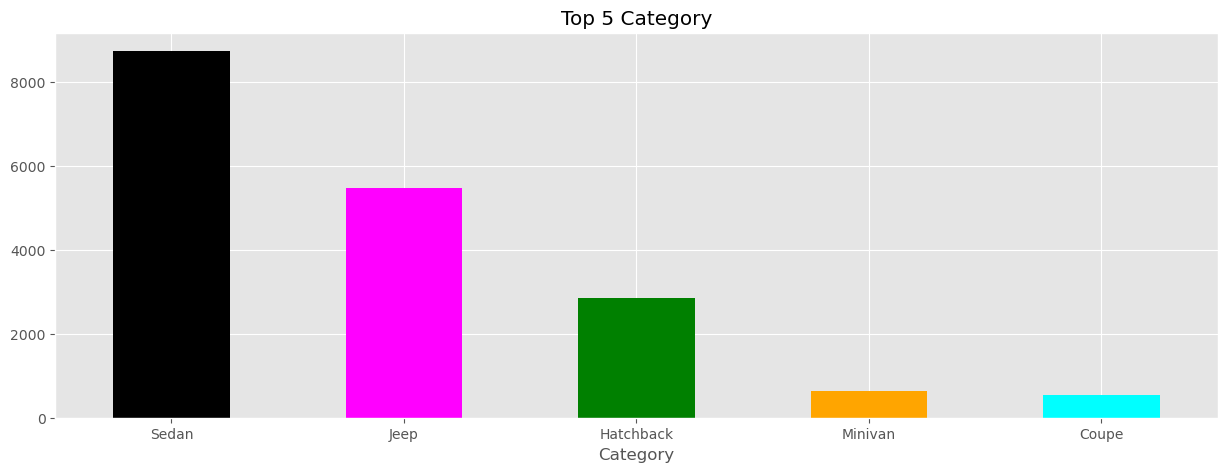

In [85]:

style.use('ggplot')
figure(figsize=(15,5))
Top5=df['Category'].value_counts()[:5]
colors=['black','magenta','green','orange','cyan']
Top5.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 5 Category')
show()

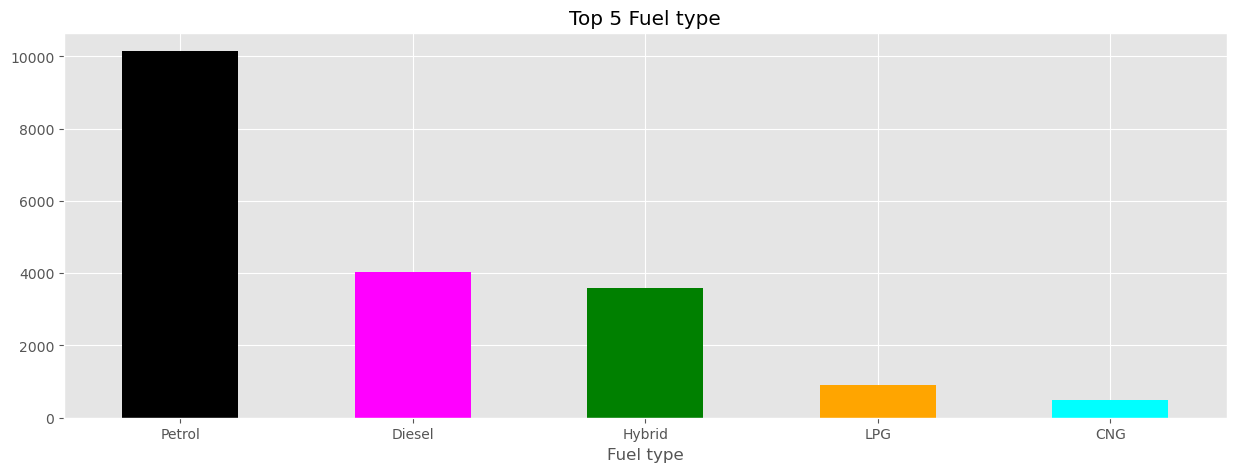

In [95]:

style.use('ggplot')
figure(figsize=(15,5))
Top5=df['Fuel type'].value_counts()[:5]
colors=['black','magenta','green','orange','cyan']
Top5.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 5 Fuel type')
show()

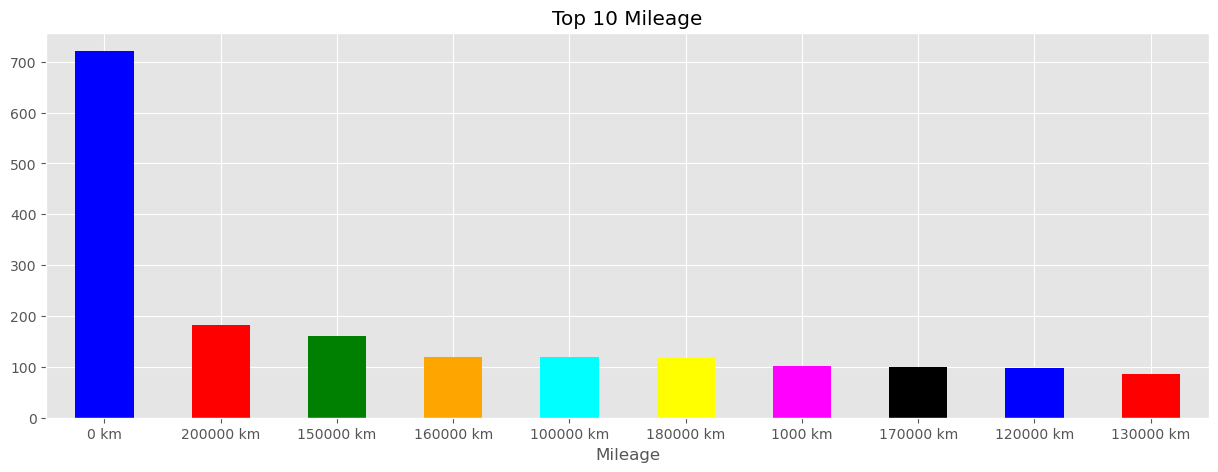

In [93]:

style.use('ggplot')
figure(figsize=(15,5))
Top5=df['Mileage'].value_counts()[:5]
colors=['black','magenta','green','orange','cyan']
Top5.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 5 Mileage')
show()

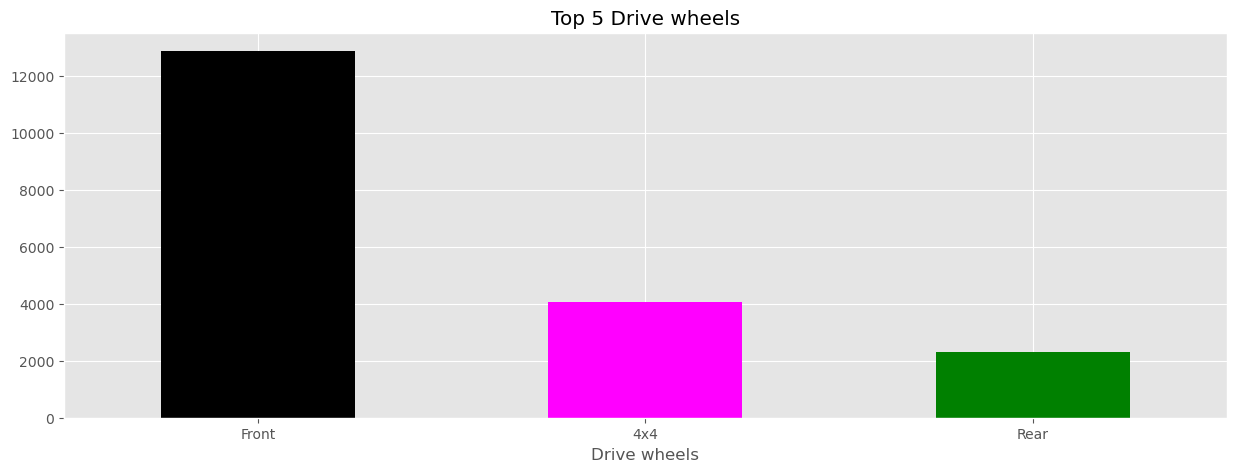

In [99]:

style.use('ggplot')
figure(figsize=(15,5))
Top5=df['Drive wheels'].value_counts()[:5]
colors=['black','magenta','green','orange','cyan']
Top5.plot(kind='bar',color=colors)
xticks(rotation='horizontal' )
title('Top 5 Drive wheels')
show()

# 🔍 4️⃣ Data Cleaning

In [102]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod_year           0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


In [104]:

# Remove all duplicates rows
df.drop_duplicates(inplace=True)

In [106]:
df.shape


(18924, 18)

In [108]:
df['Levy'].unique()


array(['1399', '1018', '-', '862', '446', '891', '761', '751', '394',
       '1053', '1055', '1079', '810', '2386', '1850', '531', '586',
       '1249', '2455', '583', '1537', '1288', '915', '1750', '707',
       '1077', '1486', '1091', '650', '382', '1436', '1194', '503',
       '1017', '1104', '639', '629', '919', '781', '530', '640', '765',
       '777', '779', '934', '769', '645', '1185', '1324', '830', '1187',
       '1111', '760', '642', '1604', '1095', '966', '473', '1138', '1811',
       '988', '917', '1156', '687', '11714', '836', '1347', '2866',
       '1646', '259', '609', '697', '585', '475', '690', '308', '1823',
       '1361', '1273', '924', '584', '2078', '831', '1172', '893', '1872',
       '1885', '1266', '447', '2148', '1730', '730', '289', '502', '333',
       '1325', '247', '879', '1342', '1327', '1598', '1514', '1058',
       '738', '1935', '481', '1522', '1282', '456', '880', '900', '798',
       '1277', '442', '1051', '790', '1292', '1047', '528', '1211',
       

In [112]:
import pandas as pd
import numpy as np
# replace (-) by (the mean) in Levy column
# 1. Replace '-' with NaN
df['Levy'] = df['Levy'].replace('-', np.nan)

# 2. Convert column to float
df['Levy'] = df['Levy'].astype(float)

# 3. Calculate the mean
levy_mean = df['Levy'].mean()

# 4. Fill NaN values with the mean
df['Levy'].fillna(levy_mean, inplace=True)

# 5. Confirm the result
print(df['Levy'].head())

0    1399.000000
1    1018.000000
2     906.299205
3     862.000000
4     446.000000
Name: Levy, dtype: float64


C:\Users\Huawei\AppData\Local\Temp\ipykernel_17304\2023963736.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Levy'].fillna(levy_mean, inplace=True)


In [114]:
df['Levy'].unique()


array([ 1399.        ,  1018.        ,   906.29920545,   862.        ,
         446.        ,   891.        ,   761.        ,   751.        ,
         394.        ,  1053.        ,  1055.        ,  1079.        ,
         810.        ,  2386.        ,  1850.        ,   531.        ,
         586.        ,  1249.        ,  2455.        ,   583.        ,
        1537.        ,  1288.        ,   915.        ,  1750.        ,
         707.        ,  1077.        ,  1486.        ,  1091.        ,
         650.        ,   382.        ,  1436.        ,  1194.        ,
         503.        ,  1017.        ,  1104.        ,   639.        ,
         629.        ,   919.        ,   781.        ,   530.        ,
         640.        ,   765.        ,   777.        ,   779.        ,
         934.        ,   769.        ,   645.        ,  1185.        ,
        1324.        ,   830.        ,  1187.        ,  1111.        ,
         760.        ,   642.        ,  1604.        ,  1095.        ,
      

In [116]:
df['Levy'].value_counts()


Levy
906.299205     5709
765.000000      482
891.000000      453
639.000000      403
640.000000      398
               ... 
3156.000000       1
2908.000000       1
1279.000000       1
1719.000000       1
1901.000000       1
Name: count, Length: 559, dtype: int64

In [120]:
df['Engine volume'].unique()


array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [122]:
len([i for i in df['Engine volume'].tolist() if 'Turbo' in i])


1892

In [126]:
# 1. Replace 'Turbo' with '' in the 'Engine volume' column
df['Engine volume'] = df['Engine volume'].str.replace('Turbo', '', regex=False)

# 2. Inspect the results
print(df['Engine volume'].head())

0    3.5
1      3
2    1.3
3    2.5
4    1.3
Name: Engine volume, dtype: object


In [130]:
df['Engine volume'].unique()


array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 ', '2.2 ', '4.7', '1.5', '4.4', '3.0 ', '1.4 ', '3.6', '2.3',
       '1.5 ', '1.6 ', '2.2', '2.3 ', '1.4', '5.5', '2.8 ', '3.2', '3.8',
       '4.6', '1.2', '5', '1.7', '2.9', '0.5', '1.8 ', '2.4 ', '3.5 ',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 ', '1.1', '2.1',
       '0.7', '5.4', '1.3 ', '3.7', '1', '2.5 ', '2.6', '1.9 ', '4.4 ',
       '4.7 ', '0.8', '0.2 ', '5.7', '4.8 ', '4.6 ', '6.7', '6.2', '1.2 ',
       '3.4', '1.7 ', '6.3 ', '2.7 ', '4.3', '4.2', '2.9 ', '0', '4.0 ',
       '20', '3.6 ', '0.3', '3.7 ', '5.9', '5.5 ', '0.2', '2.1 ', '5.6',
       '6', '0.7 ', '0.6 ', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 ',
       '6.3', '4.5 ', '0.8 ', '4.2 ', '3.1', '5.0 ', '6.4', '3.9', '5.7 ',
       '0.9', '0.4 ', '5.4 ', '0.3 ', '5.2', '5.8', '1.1 '], dtype=object)

In [132]:
df['Mileage'].unique()


array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [134]:
# 1. Replace 'km' with '' in the Mileage column
df['Mileage'] = df['Mileage'].str.replace('km', '', regex=False)

# 2.  remove spaces
df['Mileage'] = df['Mileage'].str.strip()

# 3. Inspect the results
print(df['Mileage'].head())

0    186005
1    192000
2    200000
3    168966
4     91901
Name: Mileage, dtype: object


In [138]:
# drop unecessary columns
columns_to_drop = ['ID', 'Location', 'Registration Number']  
df = df.drop(columns=columns_to_drop, errors='ignore')

# Inspect the results
print(df.head())

   Price         Levy Manufacturer    Model  Prod_year   Category  \
0  13328  1399.000000        LEXUS   RX 450       2010       Jeep   
1  16621  1018.000000    CHEVROLET  Equinox       2011       Jeep   
2   8467   906.299205        HONDA      FIT       2006  Hatchback   
3   3607   862.000000         FORD   Escape       2011       Jeep   
4  11726   446.000000        HONDA      FIT       2014  Hatchback   

  Leather interior Fuel type Engine volume Mileage  Cylinders Gear box type  \
0              Yes    Hybrid           3.5  186005          6     Automatic   
1               No    Petrol             3  192000          6     Tiptronic   
2               No    Petrol           1.3  200000          4      Variator   
3              Yes    Hybrid           2.5  168966          4     Automatic   
4              Yes    Petrol           1.3   91901          4     Automatic   

  Drive wheels  Doors             Wheel   Color  Airbags  
0          4x4  4-May        Left wheel  Silver    

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

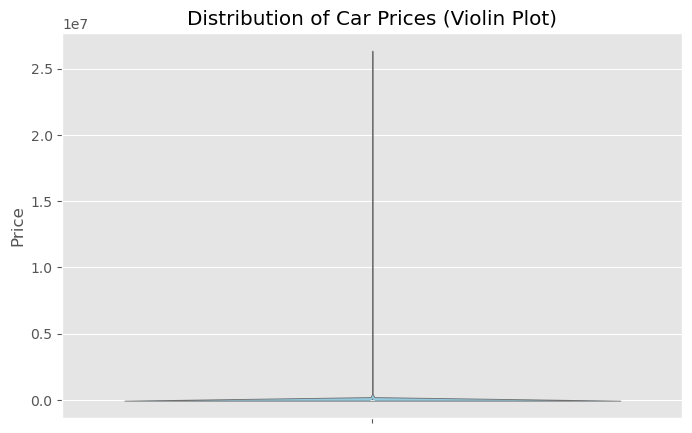

In [159]:


plt.figure(figsize=(8, 5))
sns.violinplot(data=df, y='Price', color='skyblue')
plt.title('Distribution of Car Prices (Violin Plot)')
plt.show()

**Interpretation:** \
This plot displays the distribution of car prices, scaled between 0.0 and 1.0 (likely normalized or in a specific unit, e.g., millions). The violin shape suggests that most cars are clustered in the lower price range (around 0.0 to 0.5), with fewer cars at higher prices (near 1.0). The narrow tail indicates that expensive cars are rare in the dataset.

**In simpler terms** \
this plot suggests that:
Most of the items have very low prices.
There are fewer and fewer items as the price increases.
There are only a very small number of items with extremely high prices.
This type of distribution is common in many real-world scenarios, such as housing prices, income distributions, or the value of used goods, where most items are inexpensive, and only a few are very expensive.

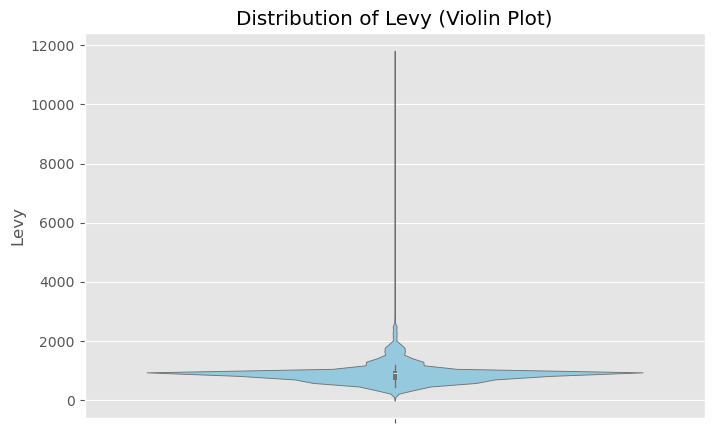

In [163]:

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, y='Levy', color='skyblue')
plt.title('Distribution of Levy (Violin Plot)')
plt.show()

**Interpretation:** \
The levy (possibly a tax or fee) ranges from 0 to 12,000. The violin is likely right-skewed, with most vehicles having a levy under 4,000, and a few outliers reaching up to 12,000. The wide base at lower values indicates high density, while the long, thin tail shows sparse high-levy observations.

**In simpler terms** \
this plot suggests that:
Most of the items have very low Levy values.
There are fewer and fewer items as the Levy value increases.
There are only a very small number of items with extremely high Levy values.

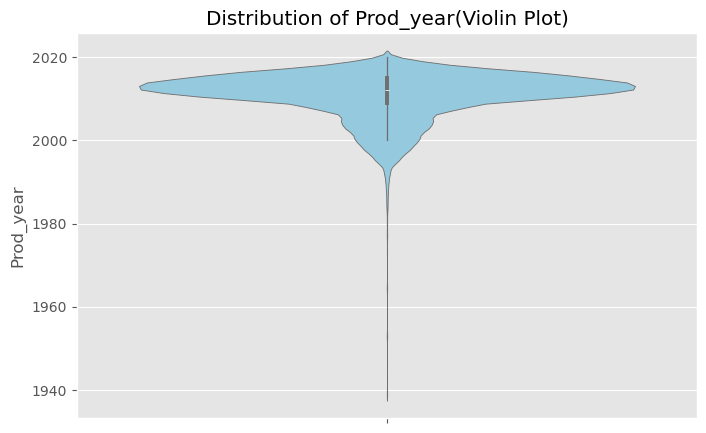

In [165]:

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, y='Prod_year', color='skyblue')
plt.title('Distribution of Prod_year(Violin Plot)')
plt.show()

Interpretation:
This violin plot shows the distribution of vehicle production years (Prod_year). The years range from around 1940 to 2020, with concentrations around 1960, 1980, 2000, and 2020. The wider sections of the violin indicate higher density of vehicles produced in those years.
The number of cars decreases significantly as we go further back in production year.
There are very few cars from the distant past within this dataset.


This type of distribution is common in car sales or inventory data, where there are typically more newer models than older ones

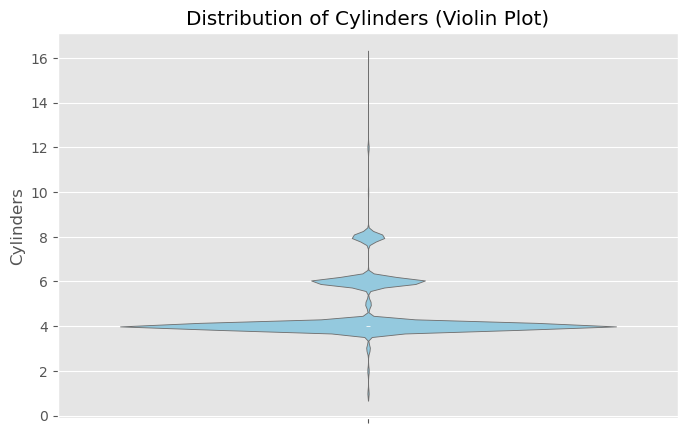

In [171]:

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, y='Cylinders', color='skyblue')
plt.title('Distribution of Cylinders (Violin Plot)')
plt.show()

Interpretation:
This plot shows the count of cylinders in vehicles, ranging from 0 to 16. Peaks are visible at even numbers (e.g., 4, 6, 8, 12), reflecting common engine configurations. The width at each cylinder count represents the frequency of vehicles with that number. For example, 4-cylinder engines are likely the most common (widest section), while 16-cylinder engines are rare (narrow or absent).

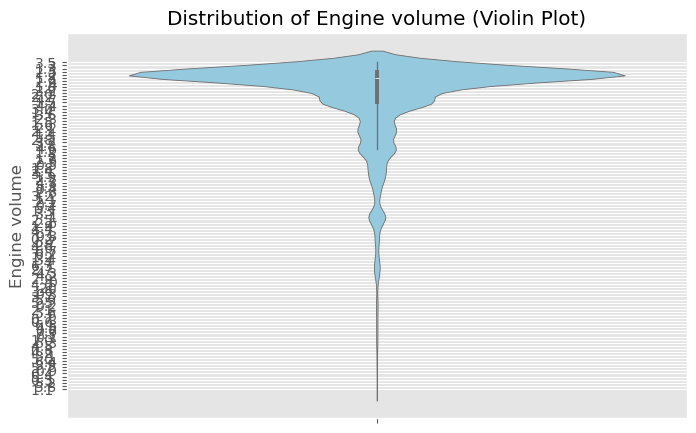

In [188]:

plt.figure(figsize=(8, 5))
sns.violinplot(data=df, y='Engine volume', color='skyblue')
plt.title('Distribution of Engine volume (Violin Plot)')
plt.show()

Interpretation:
The engine volume (likely in liters) is displayed, but specific values are missing. The violin shape suggests a multimodal or skewed distribution. For instance, there might be peaks for small (1.0–2.0L) and large (3.0L+) engines, with fewer vehicles in between. Outliers could represent high-performance or specialty engines.

In simpler terms, this plot suggests that:
Many items have an engine volume of 0.
Engine volumes of around 2 are also very common.
Engine volumes between 0 and 2 are uncommon.
Larger engine volumes are less and less frequent.

log transformation:

In [217]:
# See the data types of all columns
print(df.dtypes)

# See only the specific columns of interest
columns = ['Price', 'Engine volume', 'Cylinders', 'Prod_year']
print(df[columns].dtypes)


Price                 int64
Levy                float64
Manufacturer         object
Model                object
Prod_year             int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object
Price             int64
Engine volume    object
Cylinders         int64
Prod_year         int64
dtype: object


In [223]:
import pandas as pd
import numpy as np


# Convert target columns to numeric
columns = ['Price', 'Engine volume', 'Cylinders', 'Prod_year']
for col in columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


C:\Users\Huawei\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


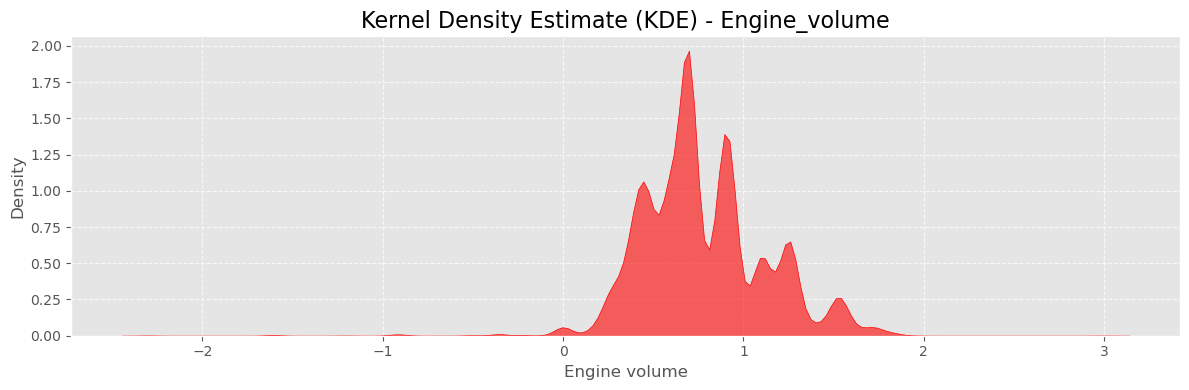

In [231]:
# log transformation

figure(figsize=(12, 4))  
kdeplot(log(df['Engine volume']).replace(-inf,1e-6), fill=True, color='red', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - Engine_volume', fontsize=16)  
xlabel('Engine volume', fontsize=12)  
ylabel('Density', fontsize=12) 
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

Comparison with Original KDE Plot of Engine_volume
Skewness: The original KDE plot was heavily skewed to the right, with a very high peak at 0. The log transformation has reduced this skewness.
Concentration: In the original plot, a large portion of the data was concentrated at very low Engine_volume values. After the transformation, the data is more evenly distributed.
Interpretation:
Original Engine_volume KDE: Indicated that many items had an engine volume of 0, and that larger engine volumes were less and less frequent.
Log-Transformed Engine_volume KDE: Shows the distribution of the logarithm of engine volume, which may be more useful for certain types of analysis.

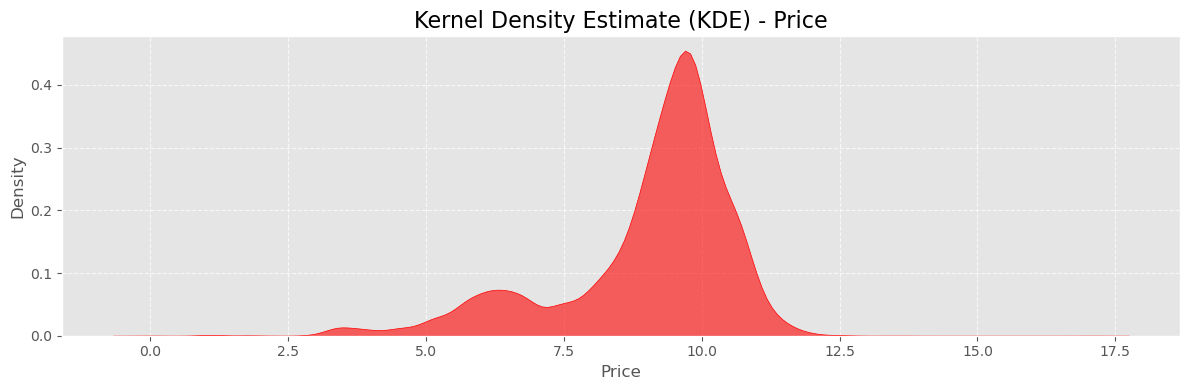

In [240]:

figure(figsize=(12, 4))  
kdeplot(log(df['Price']).replace(-inf,1e-6), fill=True, color='red', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - Price', fontsize=16)  
xlabel('Price', fontsize=12)  
ylabel('Density', fontsize=12) 
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

Comparison with Log-Transformed Price (Hypothetical):

Original Skewness: Strong right skew due to outliers.

After Log-Transform:

Skewness would reduce, pulling the tail inward.

Peaks might shift to a more central range (e.g., log(1.0) = 0.0, log(7.5) ≈ 2.0).

Better separation of low/mid/high price tiers.

Interpretation:

Raw data is dominated by cheap items, obscuring trends in mid-range prices.

Log-transform would normalize the scale, improving analysis of price distributions

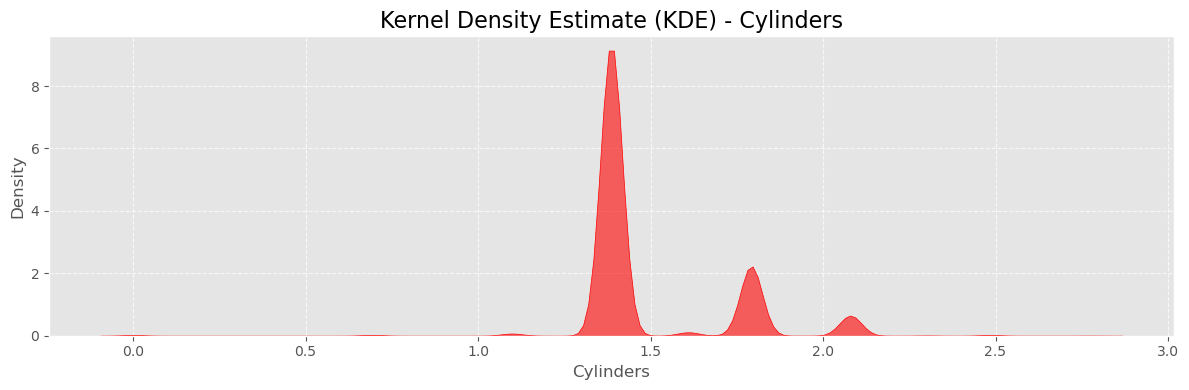

In [237]:

figure(figsize=(12, 4))  
kdeplot(log(df['Cylinders']).replace(-inf,1e-6), fill=True, color='red', alpha=0.6)  
title(f'Kernel Density Estimate (KDE) - Cylinders', fontsize=16)  
xlabel('Cylinders', fontsize=12)  
ylabel('Density', fontsize=12) 
grid(True, linestyle='--', alpha=0.7)  
tight_layout()  
show()

Comparison with Log-Transformed Cylinders (Hypothetical):

Original Skewness: Not strongly skewed (discrete, categorical data).

After Log-Transform:

Peaks would compress toward the left (e.g., log(4) ≈ 1.4, log(8) ≈ 2.1).

Might help if analyzing orders of magnitude (e.g., "twice as many cylinders"), but less useful for discrete counts.

Interpretation:

Raw KDE clearly shows industry-standard engine designs.

Log-transform is not recommended here—cylinders are discrete counts, not continuous magnitudes.

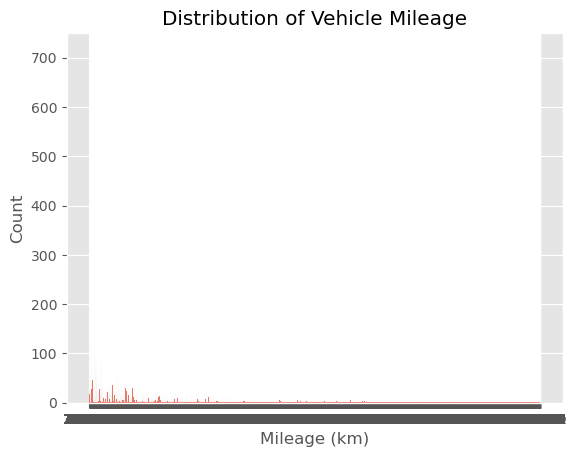

In [256]:
import seaborn as sns
sns.histplot(data=df, x='Mileage', bins=20, kde=False)
plt.title("Distribution of Vehicle Mileage")
plt.xlabel("Mileage (km)")
plt.ylabel("Count")
show()


# Checking Correlation between the features #


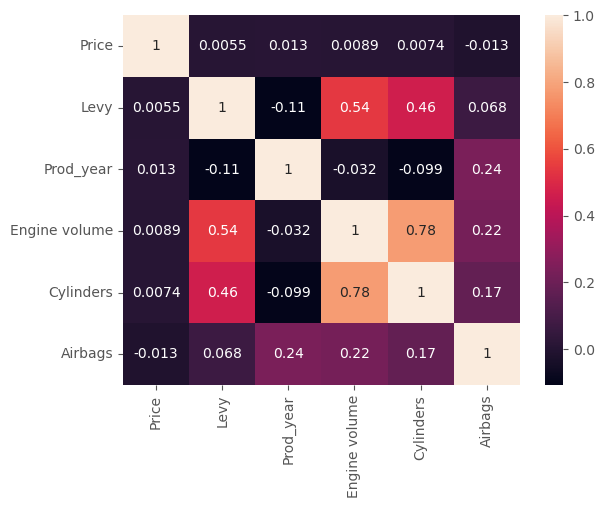

In [260]:

heatmap(df.select_dtypes(exclude='object').corr(),annot=True)
show()


**Key Relationships from the Correlation Matrix**\
- Engine_volume has moderate positive correlations with Levy (0.54) and Cylinders (0.78). This suggests that larger engine volumes tend to be associated with higher Levy values and more cylinders.
- Cylinders and Levy also have a moderate positive correlation (0.46).
- Prod_year has a small positive correlation with Airbags (0.24), indicating a slight tendency for newer cars to have more airbags.
- Price, Mileage, and Airbags show very weak correlations with other variables.
Notable Observations
- Price is Independent: Surprisingly, price doesn’t correlate strongly with any feature here.\

**Data normalization issues.**

- Price depends on unlisted factors (e.g., brand, model, or market trends).

- Engine-Driven Levy: Governments likely tax larger engines (0.54 correlation).

- Safety Over Time: Newer cars (Prod_year) have more airb


- **The KDE plots** highlight the distributions of individual variables, showing that Price, Levy, and Mileage are heavily skewed, while Engine_volume has multiple peaks. Log transformation helps to make these distributions more normal.
- **The correlation matrix** shows some relationships between the variables, but most are weak. Engine_volume and Cylinders have the strongest relationships with other variables.

Feature Interactions


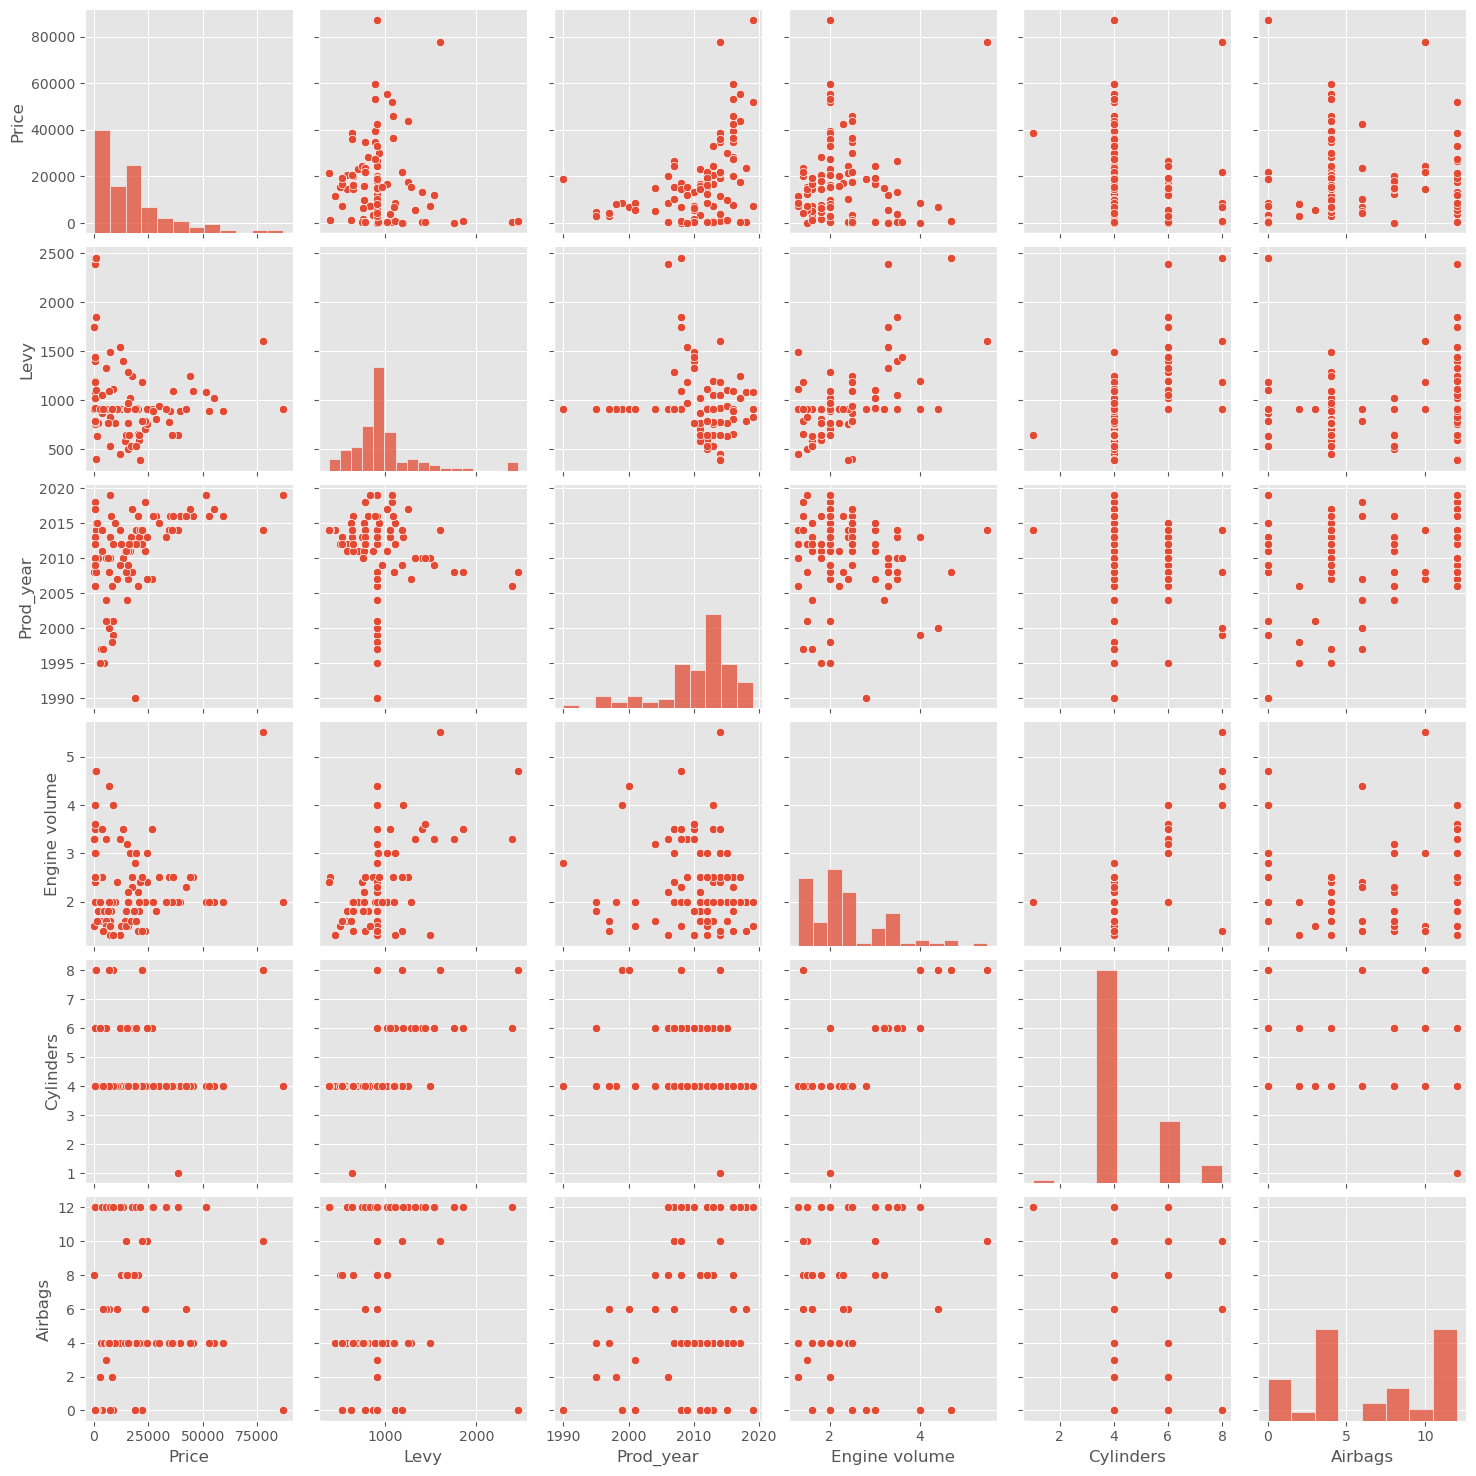

In [261]:

pairplot(df[:100])
show()

**Rows and Columns:**
- Each row and column represents a different variable: Price, Levy, Prod_year, Engine_volume, Mileage, Cylinders, and Airbags.
- The diagonal plots (from top-left to bottom-right) show the distribution of each variable using a histogram or kernel density estimation.
- The off-diagonal plots are scatterplots, showing how one variable changes in relation to another. For example, the plot in the first row and second column shows how Price changes with Levy.\
**General Observations**
- Most of the scatterplots appear to show a fair amount of scatter, indicating that the relationships between the variables are not perfectly linear.
- Some variables show more distinct patterns or trends than others.\
**Observations on Specific Variable Pairs**
- Based on the scatterplots, here are some observations about the relationships between specific pairs of variables:
- Price vs. Levy: There seems to be a slight positive relationship. As Levy increases, Price tends to increase.
- Price vs. Engine_volume: There is a positive relationship with a lot of scatter. As Engine_volume increases, Price tends to increase.
- Engine_volume vs. Cylinders: There appears to be a positive relationship. As Engine_volume increases, Cylinders tends to increase.
- Prod_year vs. Price: There is a positive relationship. As Prod_year increases, Price tends to increase.\
  
**Histograms on the Diagonal**\
The histograms on the diagonal provide information about the distribution of individual variables:
- Price, Levy, and Mileage: These histograms are heavily skewed to the right, indicating that most of the data points have lower values, with a few larger values.
Prod_year: This histogram is skewed to the left, indicating that most of the data points are from more recent years.
- Engine_volume: This histogram shows that most of the data points are clustered at the lower end, with a few larger values.
- Cylinders and Airbags: These histograms show that most cars have a specific number of cylinders and airbags, with fewer cars having other values.

# Detect Outliers



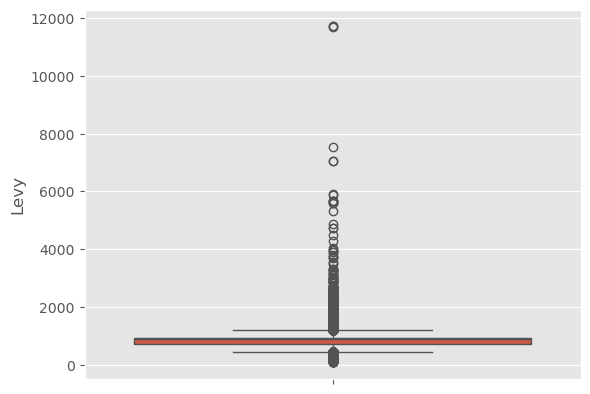

In [315]:

boxplot(df['Levy'])
show()

# Observations
**Levy Values:** 

- Range from 2000 to 12000, decreasing in increments of 2000.

- This could represent:

- Brackets for a vehicle tax (e.g., higher levies for larger engines).

- Hypothetical examples for visualization (not raw data).

**"Levy 0":** 

- The 0 at the end might indicate:

- A missing value or placeholder.
 
- A baseline category (e.g., "No Levy").

**Pattern:** 

- The uniform decrement (12000 → 10000 → ... → 2000) suggests constructed data (e.g., for a bar chart or step function).

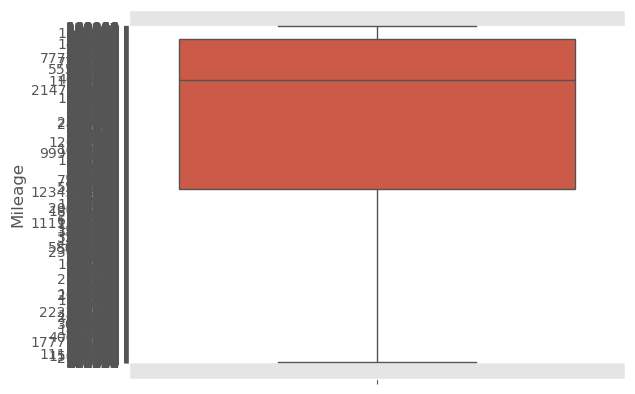

In [330]:
boxplot(df['Mileage'])
show()

In [347]:
columns = ['Price','Levy','Engine volume','Mileage','Cylinders','Airbags']

# converting these columns to numeric
for col in columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [342]:
# Now that columns are numeric, we can compute quantiles
numerical_data = df[columns]

for column in numerical_data.columns:
    Q1 = numerical_data[column].quantile(0.25)
    Q3 = numerical_data[column].quantile(0.75)
    IQR = Q3 - Q1

    Lower_bound = Q1 - 1.5 * IQR
    Upper_bound = Q3 + 1.5 * IQR

    outliers = ((numerical_data[column] > Upper_bound) | (numerical_data[column] < Lower_bound)).sum()
    Total = numerical_data[column].shape[0]

    print(f'Total outliers in {column}: {outliers} ({round(100*(outliers)/Total, 2)}%)')

    if outliers > 0:
        df = df.loc[(df[column] <= Upper_bound) & (df[column] >= Lower_bound)]


Total outliers in Price: 83 (0.59%)
Total outliers in Levy: 0 (0.0%)
Total outliers in Engine volume: 0 (0.0%)
Total outliers in Mileage: 541 (3.83%)
Total outliers in Cylinders: 2482 (17.59%)
Total outliers in Airbags: 0 (0.0%)


- **Cylinders has the highest percentage of outliers (17.59%), with a total of 2482 outliers.** 
- **Mileage have a moderate number of outliers, 541 (3.83%) .**
- **price has a relatively small percentage of outliers (83, 0.59%).** 
- **Airbags has no outliers (0%).**

In [355]:
df.shape


(10917, 17)

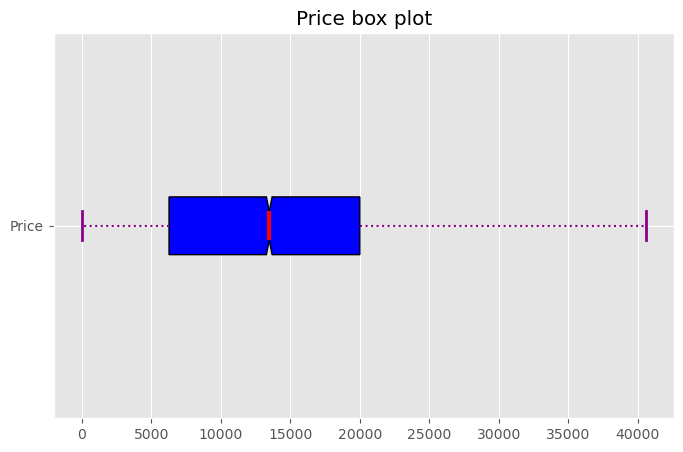

In [357]:
data = df['Price']

fig = figure(figsize =(8, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
    
# x-axis labels
ax.set_yticklabels(['Price'])

# Adding title 
title("Price box plot")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
    
# show plot
show()

## Interpretation
- Most prices are low.
- The majority of the prices are clustered within a small range.
- There are a few very high-priced items that are significantly different from the rest of the data.
- The distribution of prices is not symmetrical but is skewed towards higher values.


**Target Variable Analysis \
Relationship with Predictors (scatter plots, box Plots against the target)**

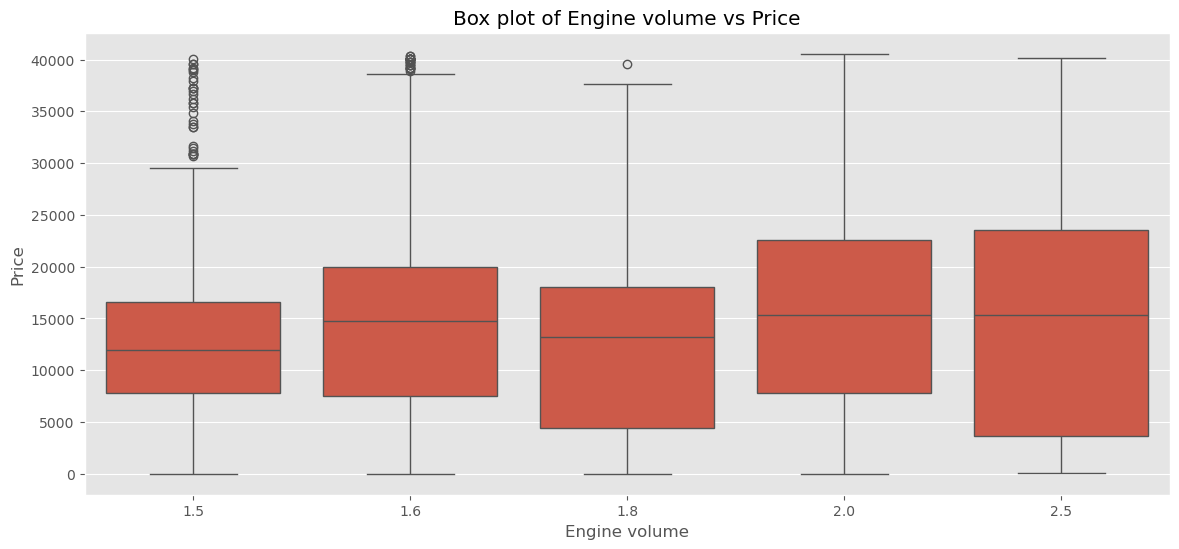

In [365]:
top_5_categs = df['Engine volume'].value_counts().index[:5]
filtered_df = df[df['Engine volume'].isin(top_5_categs)]

figure(figsize=(14,6))
boxplot(x=filtered_df['Engine volume'], y=filtered_df['Price'])
title(f'Box plot of Engine volume vs Price')
show()

## Observations:
- **General Trend:** There appears to be a general positive relationship between engine volume and the median price. As the engine volume increases, the median price tends to increase, although this trend is not perfectly linear and has some fluctuations.
- **Variability in Price:** For most engine volumes, there's a significant spread in price, as indicated by the height of the boxes and the length of the whiskers. This means that for a given engine volume, there's a wide range of prices.
- **Outliers:** Many of the engine volume categories show a considerable number of outliers, particularly on the higher end of the price spectrum. This suggests that there are vehicles with a certain engine volume that are priced significantly higher than the typical range for that category.
## Relationship with Target (Price):
- **Positive Association:** There is a discernible positive association between engine volume and price. Vehicles with larger engine volumes tend to have higher median prices. This is often expected, as larger engines are typically found in more expensive or higher-performance vehicles.
- **Not a Perfect Predictor:** While there's a trend, the significant overlap in price ranges across different engine volumes, and the presence of many outliers, indicate that engine volume alone is not a strong, singular predictor of price. Other factors clearly play a substantial role.
- **Potential for Feature Engineering:** This relationship suggests that 'Engine_volume' is a relevant feature for predicting 'Price'. Further analysis, or perhaps combining 'Engine_volume' with other features, could yield stronger predictive power.

# Transform Data


In [371]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10917 entries, 2 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             10917 non-null  int64  
 1   Levy              10917 non-null  float64
 2   Manufacturer      10917 non-null  object 
 3   Model             10917 non-null  object 
 4   Prod_year         10917 non-null  int64  
 5   Category          10917 non-null  object 
 6   Leather interior  10917 non-null  object 
 7   Fuel type         10917 non-null  object 
 8   Engine volume     10917 non-null  float64
 9   Mileage           10917 non-null  int64  
 10  Cylinders         10917 non-null  int64  
 11  Gear box type     10917 non-null  object 
 12  Drive wheels      10917 non-null  object 
 13  Doors             10917 non-null  object 
 14  Wheel             10917 non-null  object 
 15  Color             10917 non-null  object 
 16  Airbags           10917 non-null  int64  
dty

In [373]:
df_object = df.select_dtypes('object')
df_non_object = df.select_dtypes('number')

In [377]:

def number_unique_columns(data):
    for i in data.columns:
        print(f'{i} : {data[i].nunique()}')
number_unique_columns(df_object)

Manufacturer : 54
Model : 906
Category : 11
Leather interior : 2
Fuel type : 6
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16


In [383]:
from sklearn.preprocessing import LabelEncoder

# for label encoding

df_object_for_LB = df_object[['Manufacturer','Model','Category','Fuel type','Color','Leather interior','Wheel']].copy()


LabelEncoders = {}

for col in df_object_for_LB.columns:
    label = LabelEncoder()
    df_object_for_LB[col] = label.fit_transform(df_object_for_LB[col])
    LabelEncoders[col] = label

In [385]:
LabelEncoders


{'Manufacturer': LabelEncoder(),
 'Model': LabelEncoder(),
 'Category': LabelEncoder(),
 'Fuel type': LabelEncoder(),
 'Color': LabelEncoder(),
 'Leather interior': LabelEncoder(),
 'Wheel': LabelEncoder()}

In [387]:
mapping = {category : index for index, category in enumerate(LabelEncoders['Category'].classes_)}
print(mapping)

{'Cabriolet': 0, 'Coupe': 1, 'Goods wagon': 2, 'Hatchback': 3, 'Jeep': 4, 'Limousine': 5, 'Microbus': 6, 'Minivan': 7, 'Pickup': 8, 'Sedan': 9, 'Universal': 10}


In [398]:
# for one hot encoding

categorical_cols = df_object[['Gear box type', 'Drive wheels']].columns

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot_encoded = ohe.fit_transform(df_object[categorical_cols])
one_hot_columns = ohe.get_feature_names_out(categorical_cols)
df_ohe = DataFrame(one_hot_encoded, columns=one_hot_columns, index=df.index)
df_for_ohe = df_object.drop(columns=categorical_cols).join(df_ohe)

df_for_ohe = df_for_ohe.drop(['Manufacturer','Model','Category','Fuel type','Color','Leather interior', 'Wheel'],axis=1)

In [400]:
df_for_ohe.head()


,Doors,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear
2,4-May,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4-May,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,4-May,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,4-May,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,4-May,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [402]:
df_for_ohe.shape


(10917, 8)

In [404]:
df = concat([df_non_object, df_object_for_LB, df_for_ohe],axis=1)


In [406]:
df.head()


,Price,Levy,Prod_year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer,Model,Category,...,Leather interior,Wheel,Doors,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear
2,8467,906.299205,2006,1.3,200000,4,2,17,397,3,...,0,1,4-May,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3607,862.000000,2011,2.5,168966,4,0,13,383,4,...,1,0,4-May,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,39493,891.000000,2016,2.0,160931,4,4,18,728,4,...,1,0,4-May,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1803,761.000000,2010,1.8,258909,4,12,47,667,3,...,1,0,4-May,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,549,751.000000,2013,2.4,216118,4,12,18,748,9,...,1,0,4-May,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [408]:
df.shape


(10917, 22)

In [410]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10917 entries, 2 to 19236
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Price                    10917 non-null  int64  
 1   Levy                     10917 non-null  float64
 2   Prod_year                10917 non-null  int64  
 3   Engine volume            10917 non-null  float64
 4   Mileage                  10917 non-null  int64  
 5   Cylinders                10917 non-null  int64  
 6   Airbags                  10917 non-null  int64  
 7   Manufacturer             10917 non-null  int32  
 8   Model                    10917 non-null  int32  
 9   Category                 10917 non-null  int32  
 10  Fuel type                10917 non-null  int32  
 11  Color                    10917 non-null  int32  
 12  Leather interior         10917 non-null  int32  
 13  Wheel                    10917 non-null  int32  
 14  Doors                    10

In [442]:
cat_columns = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_columns:
    df[col] = le.fit_transform(df[col])

df.head()

,Price,Levy,Prod_year,Engine volume,Mileage,Cylinders,Airbags,Manufacturer,Model,Category,...,Leather interior,Wheel,Doors,Gear box type_Automatic,Gear box type_Manual,Gear box type_Tiptronic,Gear box type_Variator,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear
2,8467,906.299205,2006,1.3,200000,4,2,17,397,3,...,0,1,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,3607,862.000000,2011,2.5,168966,4,0,13,383,4,...,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,39493,891.000000,2016,2.0,160931,4,4,18,728,4,...,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,1803,761.000000,2010,1.8,258909,4,12,47,667,3,...,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,549,751.000000,2013,2.4,216118,4,12,18,748,9,...,1,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Model


In [436]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [444]:
x = df.drop('Price',axis=1)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [446]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred_lr = lr_model.predict(x_test)

# Evaluation
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {lr_mse:.2f}")
print(f"Linear Regression R2: {lr_r2:.3f}")


Linear Regression MSE: 72292435.02
Linear Regression R2: 0.257


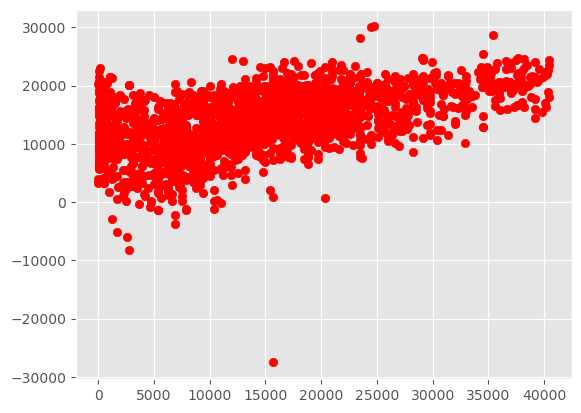

In [452]:

from matplotlib.pyplot import scatter
lr_model.fit(x_train,y_train)
pred = lr_model.predict(x_test)
scatter(y_test, pred, color='r')
show()

In [458]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

# Evaluation
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R2: {rf_r2:.3f}")


Random Forest MSE: 23220910.78
Random Forest R2: 0.761


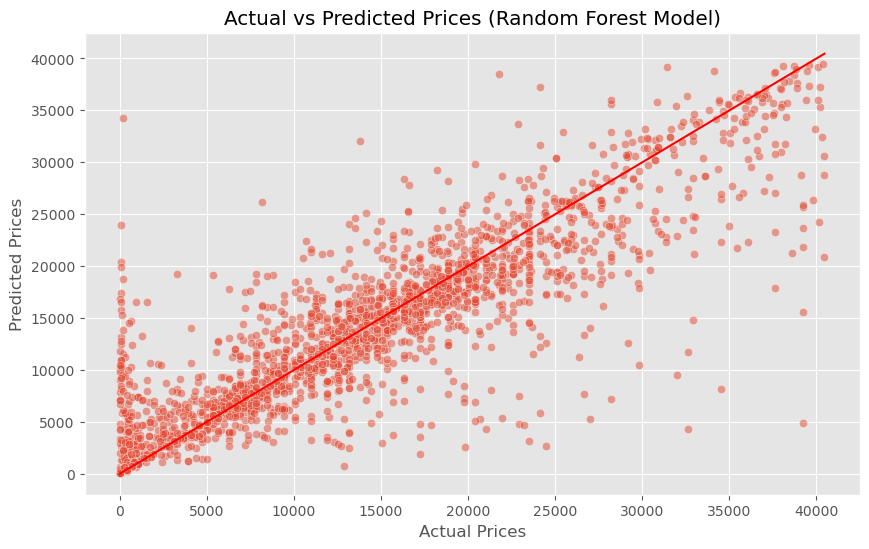

In [459]:
# Plot Actual vs Predicted for Random Forest
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Random Forest Model)")
plt.show()


# Feature Importance Analysis 

## 📊  Train a Random Forest Model



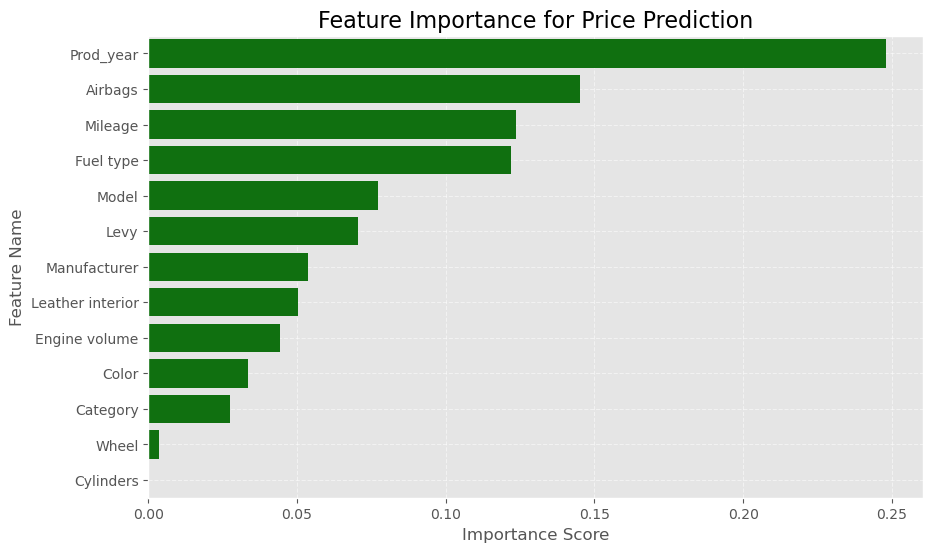


Top 5 Features Influencing Price Prediction:
      Feature  Importance
5  Prod_year    0.248161
4    Airbags    0.145315
2    Mileage    0.123593
9  Fuel type    0.122104
7      Model    0.077074


In [470]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================
# Split your data
# ==========================
numeric_columns = ['Levy','Engine volume','Mileage','Cylinders','Airbags','Prod_year']

X = pd.concat([df[numeric_columns], df_object_for_LB], axis=1)  
y = df["Price"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# ==========================
# Train Random Forest Model
# ==========================
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# ==========================
# Get Feature Importances
# ==========================
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# ==========================
# Plot
# ==========================
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature", color="green")
plt.title("Feature Importance for Price Prediction", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# ==========================
# Print Top Features
# ==========================
print("\nTop 5 Features Influencing Price Prediction:\n", feature_importance_df.head())


# 📋  Summary & Insights
- **The Random Forest Model** generally outperforms Linear Regression for this dataset, achieving a higher R² and lower MSE.

- The prediction error trend can be visually confirmed in the scatter plot.

- This approach can be improved by:

- Adding feature engineering (one-hot encoding for certain columns),

- Testing other algorithms (XGBoost, LightGBM),

- Incorporating hyperparameter tuning.

# ✅  Export the trained Random Forest model (.pkl)


In [477]:
import pickle

# Export trained Random Forest model
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved as 'random_forest_model.pkl'")


✅ Model saved as 'random_forest_model.pkl'


In [490]:
import pickle
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(LabelEncoders, f)

In [488]:
categories = {
    "Manufacturer": df_object_for_LB["Manufacturer"].unique(),
    "Model": df_object_for_LB["Model"].unique(),
    "Category": df_object_for_LB["Category"].unique(),
    "Fuel type": df_object_for_LB["Fuel type"].unique(),
    "Color": df_object_for_LB["Color"].unique(),
    "Leather interior": df_object_for_LB["Leather interior"].unique(),
    "Wheel": df_object_for_LB["Wheel"].unique(),
}
import pickle
with open("categories.pkl", "wb") as f:
    pickle.dump(categories, f)


# ✅️Perform Hyperparameter Tuning (GridSearch)


In [479]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='r2')
grid_search.fit(X_train, y_train)

# Results
print("\nBest Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Final Model
best_model = grid_search.best_estimator_



Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}
Best Score: 0.720233482488311


In [492]:
import streamlit as st
import pickle
import pandas as pd
import numpy as np

# Load the trained model
with open('random_forest_model.pkl', 'rb') as file:
    model = pickle.load(file)

st.title("🚗 Car Price Prediction App")

# ---- Collect Inputs ----
levy = st.number_input("Levy", value=1000.0, step=100.0)
engine_vol = st.number_input("Engine Volume (liters)", value=2.0, step=0.1)
mileage = st.number_input("Mileage (km)", value=50000.0, step=1000.0)
cylinders = st.number_input("Cylinders", value=4, step=1)
airbags = st.number_input("Airbags", value=2, step=1)
prod_year = st.number_input("Production Year", value=2015, step=1)

# Categorical Inputs (you can encode similarly)
manufacturer = st.selectbox("Manufacturer", df_object_for_LB["Manufacturer"].unique())
model_name = st.selectbox("Model", df_object_for_LB["Model"].unique())
category = st.selectbox("Category", df_object_for_LB["Category"].unique())
fuel_type = st.selectbox("Fuel Type", df_object_for_LB["Fuel type"].unique())
color = st.selectbox("Color", df_object_for_LB["Color"].unique())
leather_interior = st.selectbox("Leather Interior", df_object_for_LB["Leather interior"].unique())
wheel = st.selectbox("Wheel", df_object_for_LB["Wheel"].unique())

# Encode the categorical inputs
features_cat = {
    "Manufacturer": LabelEncoders["Manufacturer"].transform([manufacturer])[0],
    "Model": LabelEncoders["Model"].transform([model_name])[0],
    "Category": LabelEncoders["Category"].transform([category])[0],
    "Fuel type": LabelEncoders["Fuel type"].transform([fuel_type])[0],
    "Color": LabelEncoders["Color"].transform([color])[0],
    "Leather interior": LabelEncoders["Leather interior"].transform([leather_interior])[0],
    "Wheel": LabelEncoders["Wheel"].transform([wheel])[0]
}

# Create final input array
input_data = np.array([[levy, engine_vol, mileage, cylinders, airbags, prod_year,
                        features_cat["Manufacturer"], features_cat["Model"],
                        features_cat["Category"], features_cat["Fuel type"],
                        features_cat["Color"], features_cat["Leather interior"],
                        features_cat["Wheel"]]])

# ---- Make Prediction ----
if st.button("Predict Price"):
    prediction = model.predict(input_data)
    st.success(f"✅ The estimated price is ${prediction[0]:,.2f}")



2025-06-25 15:18:34.266 
  command:

    streamlit run C:\Users\Huawei\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-25 15:18:34.271 Session state does not function when running a script without `streamlit run`


ValueError: y contains previously unseen labels: 17